<a href="https://colab.research.google.com/github/Aakash644/Aakash644/blob/main/Bank_customer_churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Customer Churn Model**


##**Objective**

###The ultimate goal of churn analysis is to reduce churn and increase profits. As more customers stay longer, revenue should increase, and profits should follow.

##**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

##**import data**


In [8]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

##**Analyze data**


In [9]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.duplicated("CustomerId").sum()

0

In [14]:
df=df.set_index("CustomerId")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


##**Encoding**

In [16]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)

In [19]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

In [21]:
df["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [22]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace=True)

In [23]:
df["Has Credit Card"].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [24]:
df["Is Active Member"].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [30]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [33]:
df['Zero Balance']=np.where(df["Balance"]>0,1,0)

<Axes: >

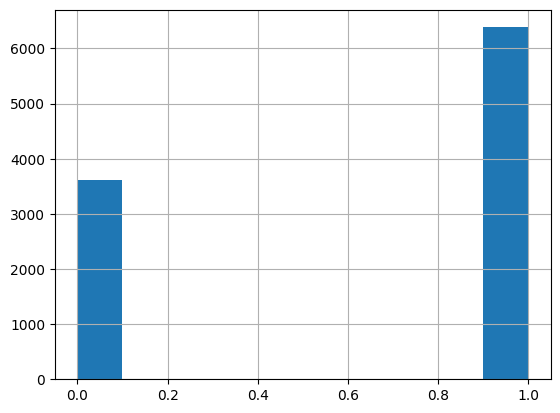

In [34]:
df["Zero Balance"].hist()

In [35]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

##**Define Label and Features**


In [37]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [38]:
X=df.drop(["Surname","Churn"],axis=1)

In [39]:
Y=df["Churn"]

In [40]:
X.shape,Y.shape

((10000, 11), (10000,))

##**Random Under Sampling**


In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
rus=RandomUnderSampler(random_state=2529)

In [45]:
X_rus,Y_rus=rus.fit_resample(X,Y)

In [48]:
X_rus.shape,Y_rus.shape,X.shape,Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [50]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [51]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

##**Random Over Sampling**

In [52]:
from imblearn.over_sampling import RandomOverSampler


In [54]:
ros=RandomOverSampler(random_state=2529)

In [55]:
X_ros,Y_ros=ros.fit_resample(X,Y)

In [56]:
X_ros.shape,Y_ros.shape,X.shape,Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [57]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [58]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

##**Tran Test Split**

In [59]:
from sklearn.model_selection import train_test_split

##**Split Original Data**

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=2529)

In [142]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

##**Split Random Under Sample Data**

In [143]:
X_train_rus,X_test_rus,Y_train_rus,Y_test_rus=train_test_split(X_rus,Y_rus,train_size=0.7,random_state=2529)

In [144]:
X_train_rus.shape,X_test_rus.shape,Y_train_rus.shape,Y_test_rus.shape

((2851, 11), (1223, 11), (2851,), (1223,))

##**Split Random Over Sample Data**


In [147]:
X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,train_size=0.7,random_state=2529)

In [146]:
X_train_ros.shape,X_test_ros.shape,Y_train_ros.shape,Y_test_ros.shape

((11148, 11), (4778, 11), (11148,), (4778,))

##**Standardize Features**

In [66]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()

##**Standardize Original Data**

In [96]:
X_train[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_train[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

In [98]:
X_test[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_test[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

##**Standardize Random Under Sample Data**

In [148]:
X_train_rus[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_train_rus[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

In [149]:
X_test_rus[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_test_rus[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

##**Standardize Random Over Sample Data**

In [150]:
X_train_ros[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_train_ros[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

In [151]:
X_test_ros[["CreditScore","Tenure","Age","Balance","Estimated Salary"]]=sc.fit_transform(X_test_ros[["CreditScore","Tenure","Age","Balance","Estimated Salary"]])

##**Support Vector Machine Classifier**

In [106]:
from sklearn.svm import SVC

In [107]:
svc=SVC()

In [108]:
svc.fit(X_train,Y_train)

SVC()

In [109]:
y_pred=svc.predict(X_test)

##**Model Accuracy**

In [110]:
from sklearn.metrics import confusion_matrix,classification_report

In [111]:
confusion_matrix(Y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [112]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



##**Hyperparameter Tuning**

In [113]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [118]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [119]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [120]:
grid_pred=grid.predict(X_test)

In [122]:
confusion_matrix(Y_test,grid_pred)

array([[2159,  255],
       [ 343,  243]])

In [123]:
print(classification_report(Y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



##**Model with Random Under Sampling**

In [124]:
svc_rus=SVC()

In [152]:
svc_rus.fit(X_train_rus,Y_train_rus)

SVC()

In [153]:
y_pred_rus=svc_rus.predict(X_test_rus)

##**Model Accuracy**

In [154]:
confusion_matrix(Y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [155]:
print(classification_report(Y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



##**Hyperparameter Tuning**

In [156]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [158]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train_rus,Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [159]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [163]:
grid_pred_rus=grid.predict(X_test_rus)

In [164]:
confusion_matrix(Y_test_rus,grid_pred_rus)

array([[476, 151],
       [172, 424]])

In [165]:
print(classification_report(Y_test_rus,grid_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



##**MODEL with Random Over Sampling**

In [166]:
svc_ros=SVC()

In [167]:
svc_ros.fit(X_train_ros,Y_train_ros)

SVC()

In [168]:
y_pred_ros=svc_ros.predict(X_test_ros)

##**Model Accuracy**

In [169]:
confusion_matrix(Y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [170]:
print(classification_report(Y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



##**Hyper Parameter Tuning**

In [171]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [172]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [173]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [174]:
grid_pred_ros=grid.predict(X_test_ros)

In [175]:
confusion_matrix(Y_test_ros,grid_pred_ros)

array([[2047,  332],
       [  68, 2331]])

In [176]:
print(classification_report(Y_test_ros,grid_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

